# 1) Importing all the libraries required

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 2) Exploring the data

In [33]:
df=pd.read_csv("train.csv")

In [34]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [36]:
df=df[['LotArea','SalePrice']]

In [37]:
df

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
...,...,...
1455,7917,175000
1456,13175,210000
1457,9042,266500
1458,9717,142125


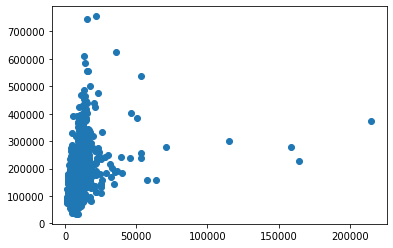

In [38]:
plt.scatter(x='LotArea',y='SalePrice',data=df)

In [39]:
X_train=df['LotArea']
Y_train=df['SalePrice']

# 3) Working on simple Linear Regression

In [40]:
def fit_linear_model(x,w0,w1):
  y=x.apply(lambda x_point : x_point*w1+w0)  
  return y

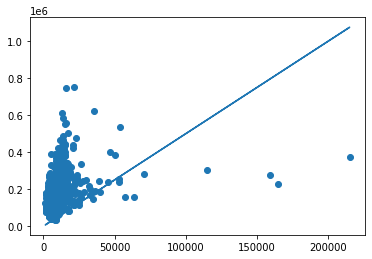

In [41]:
Y_predicted=fit_linear_model(X_train,4,5)
plt.scatter(X_train,Y_train)
plt.plot(X_train,Y_predicted)

In [42]:
def cost_RSS(Y_train,Y_predicted):
  error=Y_train-Y_predicted
  error_squared=error**2
  RSS=error_squared.sum()
  return RSS

In [43]:
cost_RSS(Y_train,Y_predicted)

33834652163125

In [44]:
# To minimize cost_RSS we find the best w0 and w1 

## Approach 1 : Closed form solution

In [45]:
len(df.index)

1460

In [46]:
def BEST_Parameters_for_linear_model(X,Y):
  
  A=Y.sum()
  B=X.sum()
  N=len(X.index)
  C=(X*Y).sum()
  D=(X*X).sum()

  w1 = (C*N - A*B) / (N*D - B*B)
  w0 = (A-B*w1) / N 
  return [w0,w1]

In [47]:
[w0_best,w1_best]=BEST_Parameters_for_linear_model(X_train,Y_train)

In [48]:
w0_best,w1_best

(158836.1518968766, 2.0999719517076745)

In [49]:
Y_predicted=fit_linear_model(X_train,w0_best,w1_best)

In [50]:
cost_RSS(Y_train,Y_predicted)

8566918098863.25

In [51]:
# Now by using the built-in library
from sklearn.linear_model import LinearRegression

In [52]:
# -1 in reshape helps us to convert the given array into an array with 1 col and unknown number of rows which is compatible with original shape of array
X_train_np=np.array(X_train).reshape(-1,1)
Y_train_np=np.array(Y_train).reshape(-1,1)
model=LinearRegression().fit(X_train_np,Y_train_np)

In [53]:
X_train_np,Y_train_np

(array([[ 8450],
        [ 9600],
        [11250],
        ...,
        [ 9042],
        [ 9717],
        [ 9937]]), array([[208500],
        [181500],
        [223500],
        ...,
        [266500],
        [142125],
        [147500]]))

In [54]:
Y_predicted=model.predict(X_train_np)

In [55]:
model.intercept_,model.coef_   # same as our own model done using our algorithm

(array([158836.15189688]), array([[2.09997195]]))

In [56]:
cost_RSS(Y_train_np,Y_predicted)

8566918098863.25

## Approach 2 : Gradient descent solution

In [57]:
from sklearn import preprocessing

In [58]:
X=np.array([[1,2,3,4]])
Y=np.array([[3,5,7,9]])
# Y = 2*X + 1 


In [59]:
def gradient_descent(learning_step_size,convergence_value,iterations,X,Y):
  A=Y.sum()
  B=X.sum()
  N=len(X)
  C=(X*Y).sum()
  D=(X*X).sum()
  w0=0
  w1=0
  i=0    # To control the number of iterations if it crosses a certain limit for the gradient to converge to 0
  while( np.abs([(-2*(A-B*w1-w0*N))])>convergence_value  and np.abs([(-2*(C-D*w1-w0*B))]) > convergence_value and i<iterations ):
    w0_old_value=w0
    w1_old_value=w1
    w0=w0-learning_step_size*(-2*(A-B*w1_old_value-w0_old_value*N))
    w1=w1-learning_step_size*(-2*(C-D*w1_old_value-w0_old_value*B))
    print("w0 :" + str(w0) + " w1 :" + str(w1) + " gradient : " + str(([(-2*(A-B*w1-w0*N))])) + " , " + str(([(-2*(C-D*w1-w0*B))])))
    i=i+1
  return [w0,w1]

In [60]:

w0_best,w1_best=gradient_descent(0.0005,0.01,200,X,Y)  # tolerance value of 0.01 , step-size = 0.0005 passed and also max_iterations of 200 passed 

w0 :0.024 w1 :0.07 gradient : [-46.552] , [-135.32000000000002]
w0 :0.047276 w1 :0.13766 gradient : [-45.152248] , [-130.79488]
w0 :0.069852124 w1 :0.20305744 gradient : [-43.799146952] , [-126.41951112]
w0 :0.09175169747600001 w1 :0.26626719556 gradient : [-42.491152693848] , [-122.18893431688001]
w0 :0.11299727382292402 w1 :0.32736166271844 gradient : [-41.226772197985355] , [-118.09835476043511]
w0 :0.1336106599219167 w1 :0.38641084009865756 gradient : [-40.00456187818302] , [-114.14313639564222]
w0 :0.1536129408610082 w1 :0.44348240829647867 gradient : [-38.823125952348406] , [-110.31879668499113]
w0 :0.17302450383718243 w1 :0.4986418066389742 gradient : [-37.68111485954615] , [-106.6210015249179]
w0 :0.19186506126695552 w1 :0.5519523074014332 gradient : [-36.57722372943743] , [-103.0455603305749]
w0 :0.21015367313167424 w1 :0.6034750875667206 gradient : [-35.510190902402236] , [-99.58842128336329]
w0 :0.22790876858287537 w1 :0.6532692982084023 gradient : [-34.478796498666206] , [-

In [61]:
w0_best,w1_best

(0.961684865552514, 2.012683050094437)

# 4) Exploring Influence of high leverage points

## a) Example of a high Leverage Point

In [62]:
df=pd.read_csv("Philadelphia_Crime_Rate_noNA.csv")

In [63]:
df

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
...,...,...,...,...,...,...,...
94,174232,17.4232,13.8,25.0,4.7,Westtown,Chester
95,196515,19.6515,29.9,16.0,1.8,Whitemarsh,Montgome
96,232714,23.2714,9.9,21.0,0.2,Willistown,Chester
97,245920,24.5920,22.6,10.0,0.3,Wynnewood,Montgome


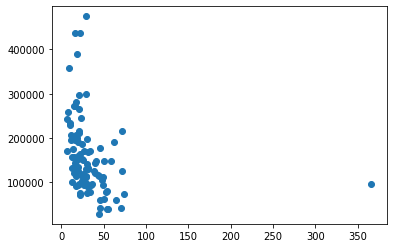

In [64]:
plt.scatter(df['CrimeRate'],df['HousePrice'])

In [65]:
X=df['CrimeRate']
Y=df['HousePrice']
X=np.array(X).reshape(-1,1)
Y=np.array(Y).reshape(-1,1)
model=LinearRegression().fit(X,Y)

In [66]:
Y_pred=model.predict(X)

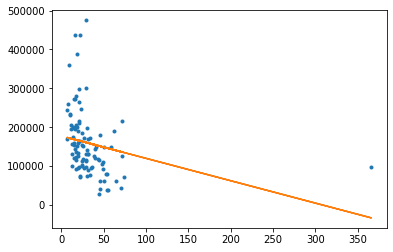

In [67]:
plt.plot(X,Y,'.',X,Y_pred,'-')

In [68]:
df[df['CrimeRate']>350]  # Centre City is one place where crime rates are extremely high but house prices are not that low , this point does follow the trend of the rest of the data very well . A question is how much including Centre CIty will affect our fit on other datapoints ,  let's remove it and then observe it 

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
62,96200,9.62,366.1,0.0,4.8,"Phila,CC",Phila


In [69]:
len(df)

99

In [70]:
df2=df[df["Name"]!='Phila,CC']

In [71]:
X2=df2['CrimeRate']
Y2=df2['HousePrice']
X2=np.array(X2).reshape(-1,1)
Y2=np.array(Y2).reshape(-1,1)
model_withNoCC=LinearRegression().fit(X2,Y2)

In [72]:
Y2_pred=model_withNoCC.predict(X2)

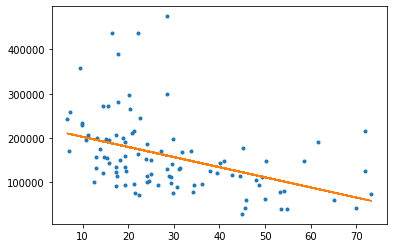

In [73]:
plt.plot(X2,Y2,'.',
         X2,model_withNoCC.predict(X2),'-')

In [74]:
print(model.intercept_)
print(model.coef_)
print(model_withNoCC.intercept_)
print(model_withNoCC.coef_)


[176629.40810695]
[[-576.90812768]]
[225233.551839]
[[-2288.68942995]]


Note : Above we see that for no CC the decrease in house value per unit increase in CrimeRate is 2288 whereas in original dataset , we said it's 576 so that's a significant drop

## b) High leverage points: 
Center City is said to be a "high leverage" point because it is at an extreme x value where there are not other observations.  As a result, recalling the closed-form solution for simple regression, this point has the *potential* to dramatically change the least squares line since the center of x mass is heavily influenced by this one point and the least squares line will try to fit close to that outlying (in x) point.  If a high leverage point follows the trend of the other data, this might not have much effect.  On the other hand, if this point somehow differs, it can be strongly influential in the resulting fit.


## c) Influential observations:  
An influential observation is one where the removal of the point significantly changes the fit.  As discussed above, high leverage points are good candidates for being influential observations, but need not be.  Other observations that are *not* leverage points can also be influential observations (e.g., strongly outlying in y even if x is a typical value).

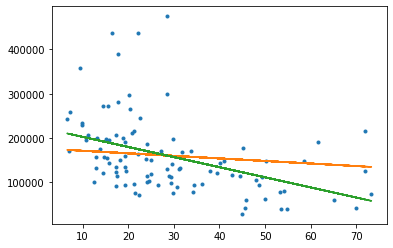

In [75]:
plt.plot(X2,Y2,'.',
         X2,model.predict(X2),'-',
         X2,model_withNoCC.predict(X2),'-')

## d) Example of high-value outlier neighborhoods 

In [76]:
len(df)

99

In [77]:
df

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
...,...,...,...,...,...,...,...
94,174232,17.4232,13.8,25.0,4.7,Westtown,Chester
95,196515,19.6515,29.9,16.0,1.8,Whitemarsh,Montgome
96,232714,23.2714,9.9,21.0,0.2,Willistown,Chester
97,245920,24.5920,22.6,10.0,0.3,Wynnewood,Montgome


In [78]:
df3=df2[df2['HousePrice']<350000]
df3

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
...,...,...,...,...,...,...,...
94,174232,17.4232,13.8,25.0,4.7,Westtown,Chester
95,196515,19.6515,29.9,16.0,1.8,Whitemarsh,Montgome
96,232714,23.2714,9.9,21.0,0.2,Willistown,Chester
97,245920,24.5920,22.6,10.0,0.3,Wynnewood,Montgome


In [79]:
len(df3)

93

In [80]:
X3=df3['CrimeRate']
Y3=df3['HousePrice']
X3=np.array(X3).reshape(-1,1)
Y3=np.array(Y3).reshape(-1,1)
model_withNoHighEnd=LinearRegression().fit(X3,Y3)

In [81]:
print(model.intercept_)
print(model.coef_)
print(model_withNoCC.intercept_)
print(model_withNoCC.coef_)
print(model_withNoHighEnd.intercept_)
print(model_withNoHighEnd.coef_)


[176629.40810695]
[[-576.90812768]]
[225233.551839]
[[-2288.68942995]]
[199098.8526698]
[[-1838.56264859]]


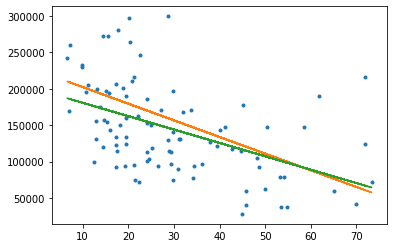

In [82]:
plt.plot(X3, Y3, '.',
         X3, model_withNoCC.predict(X3), '-',
         X3, model_withNoHighEnd.predict(X3), '-')  

Above: We see that removing the outlying high-value neighborhoods has some effect on the fit, but not nearly as much as our high-leverage Center City datapoint.